IERG4190/IEMS5707 Multimedia Coding and Processing (Fall 2023)

Lecture 8: Image Processing - Coding Practice

This is also the assignment 3. Please complete this colab and:

* Download it as .ipynb file (click on file -> download -> download as .ipynb file)
* Submit .ipynb file to blackboard

**Deadline of submission**: 23:59, Nov. 5th (Sunday), 2023

**To get started:**

1. Make a copy of this colab

2. Please download images from this folder and upload them to your Google Dirve:

https://drive.google.com/drive/folders/1_842yB1eqEDxhqIHFh-QwbmM6TGmwJq8?usp=sharing

In [ ]:
#@title Import all necessary libraries

import os
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from google.colab import drive

In [ ]:
#@title Mount Google drive (you need to grant colab to access your Google Drive)

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Please set this path to the Google drive that contains all the images

srcpath = 'Colab Notebooks/IERG4190_images/'  #@param {type:"string"}
srcpath = os.path.join('/content/drive/My Drive', srcpath)

In [ ]:
#@title Also run this block before running any of following exercises

def load_image(filename):
  # Load image
  im = cv2.imread(os.path.join(srcpath, filename))
  # Convert it RGB order
  im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
  # Normalize an image to 0.0, 1.0
  im = im.astype(np.float32)/255
  return im

from matplotlib import rc
rc('animation', html='jshtml')

def create_anim(imlist, interval):
  fig = plt.figure()
  fig_im = plt.imshow(imlist[0], cmap='gray')
  def frame(j):
    fig_im.set_array(imlist[j])
    return [fig_im]
  anim = animation.FuncAnimation(
      fig, frame, frames=len(imlist), blit=False, repeat=True, interval=interval)
  return anim

# Section 1. Python Basics

## Question a)

Create a matrix m with following value:

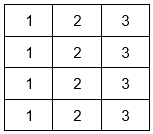

In [ ]:
# Your code goes here
m = np.array([[1,2,3], [1,2,3], [1,2,3], [1,2,3]])

In [ ]:
print(m)

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]


## Question b)

Create a vector v with following value:

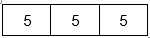

In [ ]:
# Your code goes here
v = np.array([[5,5,5]])

In [ ]:
print(v)

[[5 5 5]]


## Question c)

Change the last element the array v to 6.

In [ ]:
# Your code goes here
v[0,:] = 6


In [ ]:
print(v)

[[6 6 6]]


## Question d)

Add the array v to every row of matrix m

In [ ]:
# Your code goes here

result = m[:,:] = m[:,:] + v

In [ ]:
print(result)

[[7 8 9]
 [7 8 9]
 [7 8 9]
 [7 8 9]]


# Section 2. Image as a matrix

Load an image



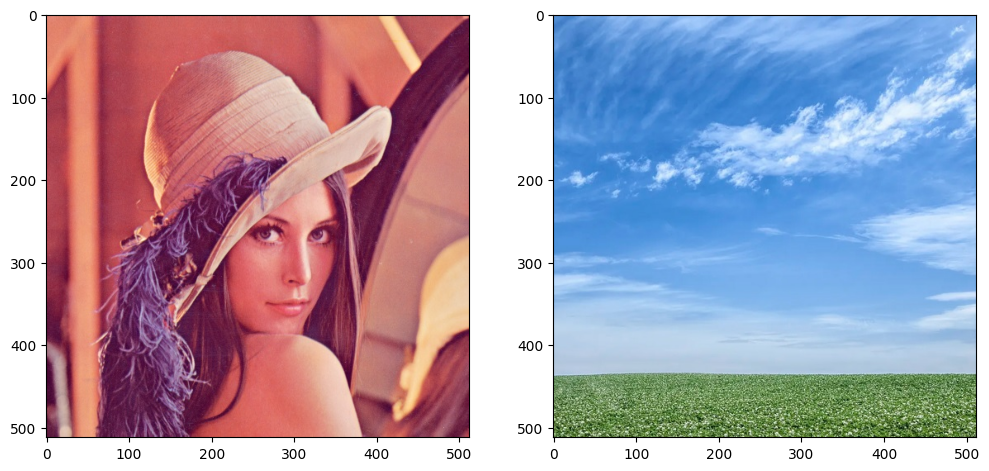

In [ ]:
im_lenna = load_image('lenna.jpg')
im_sky = load_image('sky.jpg')

plt.figure(figsize=(12, 6))  # Create a figure with size w = 12 and h = 6
plt.subplot(1, 2, 1)
plt.imshow(im_lenna)  # Display 1st image
plt.subplot(1, 2, 2)
plt.imshow(im_sky)

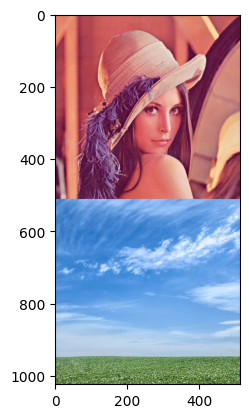

In [ ]:
#@title Example: Combine two images

combined = np.concatenate((im_lenna, im_sky), axis=0)
plt.imshow(combined)

In [ ]:
#@title Example: print the size of a loaded image

height, width, channels = im_lenna.shape
print(height, width, channels)

512 512 3


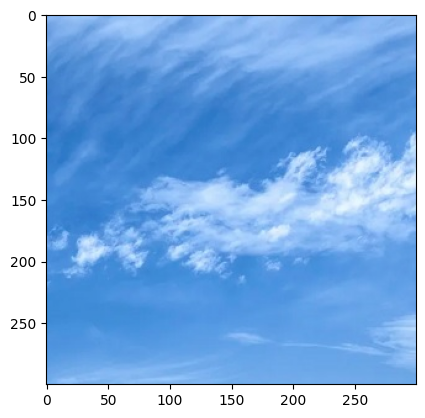

In [ ]:
#@title Example: Keep row 0 to 300 and column 100 to 400
crop = im_sky[0:300, 100:400, :]
plt.imshow(crop)

## Question a)

Load in the test image `lenna.jpg` and crop out the face. It should look something like this

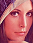

In [ ]:
im_lenna = load_image('lenna.jpg')

In [ ]:
# Your code goes here

crop = im_lenna[200:400, 200:350, :]


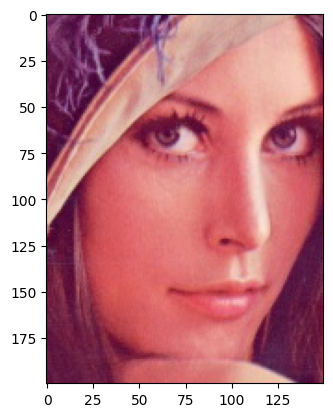

In [ ]:
plt.imshow(crop)

## Question b)

Also load the test image `sky.jpg` and concatenate sky image and lenna image **horizontally**.

In [ ]:
im_sky = load_image('sky.jpg')

In [ ]:
# Your code goes here

concatenated = np.concatenate((im_lenna, im_sky), axis=1)

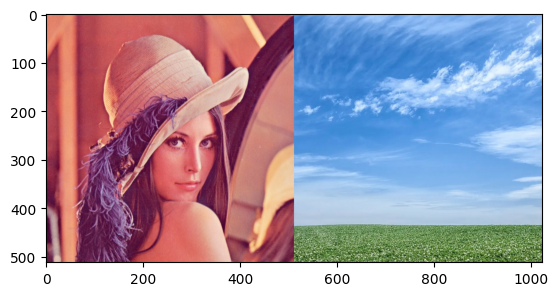

In [ ]:
plt.imshow(concatenated)

# Section 3. Program and control flow [No question for this section]

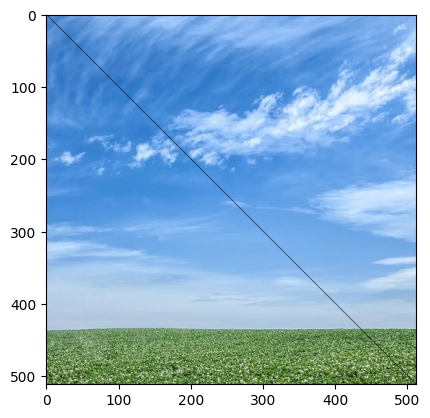

In [ ]:
#@title Example: for loop

im = load_image('sky.jpg')
for i in range(512):
    im[i,i,:] = 0
plt.imshow(im)

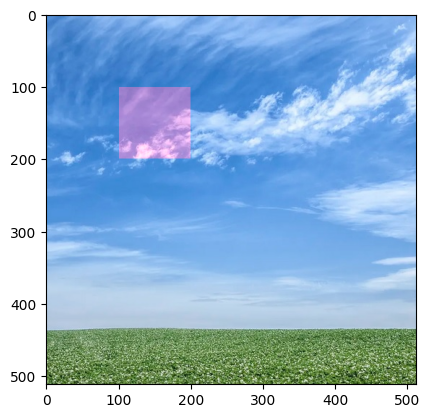

In [ ]:
#title Example: if statement

im = load_image('sky.jpg')
height, width, channels = im.shape
for y in range(height):
  for x in range(width):
    if x > 100 and x < 200 and y > 100 and y < 200:
        # Add red tint to this pixel
        im[y, x, 0] = np.clip(im[y, x, 0] + 0.4, 0.0, 1.0)

plt.imshow(im)

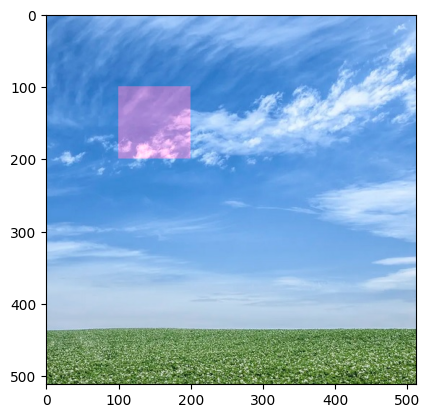

In [ ]:
#@title The if statement about can also be written as:

im = load_image('sky.jpg')
im[100:200, 100:200, 0] = np.clip(im[100:200, 100:200, 0] + 0.4, 0.0, 1.0)
plt.imshow(im)

# Section 4. 2D Filter

## Example: Load lenna image and add Gaussian noise

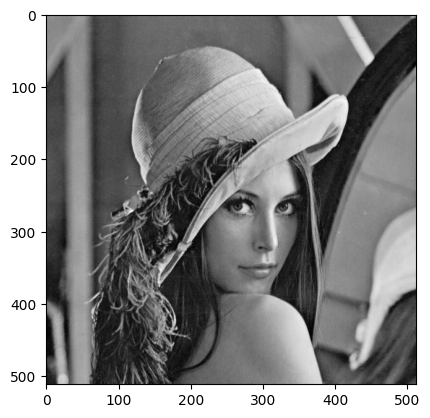

In [ ]:
# Load lenna image and convert to gray scale.
im = load_image('lenna.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im, cmap='gray')

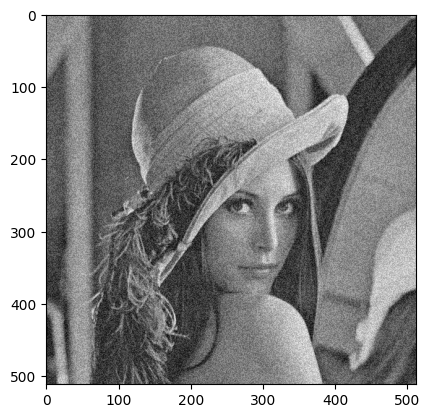

In [ ]:
# Add Gaussian noise with sigma = 0.3
h, w = im.shape
im_noisy = im + 0.3 * np.random.rand(h, w).astype(np.float32)
plt.imshow(im_noisy, cmap='gray')

## Example: Create a box filter and a Gaussian filter

In [ ]:
# Box filter
N = 5
box_kernel = np.ones((5, 5), np.float32) / 25
print(box_kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


In [ ]:
# Gaussian filter
N2 = N // 2 - 1
sigma = N2 / 2
x, y = np.meshgrid(np.linspace(-N2, N2, N), np.linspace(-N2, N2, N))
gauss_kernel = np.exp(-(x*x+y*y)/sigma*2/2)
gauss_kernel = gauss_kernel / np.sum(gauss_kernel[:])
print(gauss_kernel)

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


## Example: Apply a filter

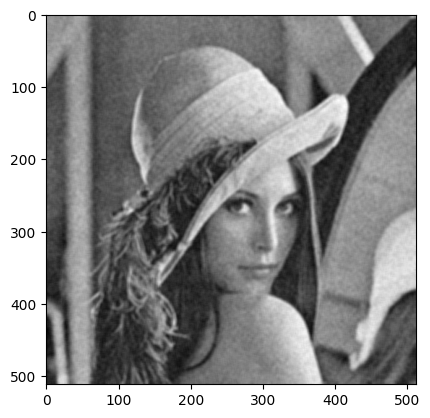

In [ ]:
im_filtered = cv2.filter2D(src=im_noisy, ddepth=-1, kernel= box_kernel)
plt.imshow(im_filtered, cmap='gray')

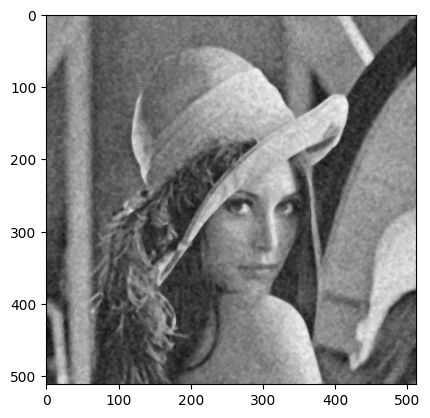

In [ ]:
# Median filter
im_filtered = cv2.medianBlur(im_noisy, N)
plt.imshow(im_filtered, cmap='gray')

## Question a)



Apply Gaussian filter, box filter, and 2D median filter to this image. Compare these three results.

In [ ]:
# Your code goes here

im_box_filtered = cv2.filter2D(src=im_noisy, ddepth=-1, kernel= box_kernel)
# im_gaussian_filtered = cv2.GaussianBlur(src=im_noisy, ksize= (5, 5), sigmaX=0, sigmaY=0)
im_gaussian_filtered = cv2.filter2D(src=im_noisy, ddepth=-1, kernel= gauss_kernel)
im_median_filtered = cv2.medianBlur(im_noisy, N)

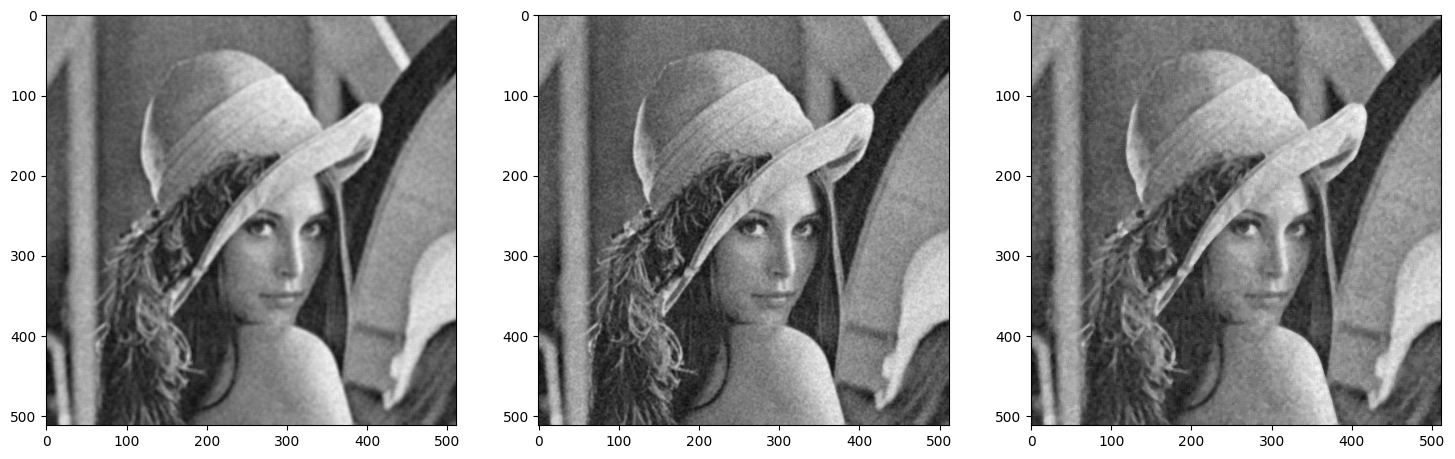

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1); plt.imshow(im_box_filtered, cmap='gray')
plt.subplot(1, 3, 2); plt.imshow(im_gaussian_filtered, cmap='gray')
plt.subplot(1, 3, 3); plt.imshow(im_median_filtered, cmap='gray')

## Question b)

Calculate the sharpening filter from Gaussian filter, using in Slide 55, Lecture Note 6. Apply it this lenna.jpg (not the noisy one) with sharpening strength 1.0, 3.0, and 8.0 and compare them.

Note that you should clip the output to [0.0, 1.0] before visualization!

In [ ]:
# Your code goes here
i_kernel = np.zeros((5, 5), np.float32)
i_kernel[2, 2] = 1
sharpen_kernel_1 = (1+1) * i_kernel - 1 * gauss_kernel
sharpen_kernel_3 = (1+3) * i_kernel - 3 * gauss_kernel
sharpen_kernel_8 = (1+8) * i_kernel - 8 * gauss_kernel
# print(sharpen_kernel)
# print(cv2.filter2D(im, -1, sharpen_kernel, borderType=cv2.BORDER_REPLICATE))

factor = 1
sharpend_1 = cv2.filter2D(im, -1, sharpen_kernel_1, borderType=cv2.BORDER_REPLICATE)
factor = 3
sharpend_3 = cv2.filter2D(im, -1, sharpen_kernel_3, borderType=cv2.BORDER_REPLICATE)
factor = 8
sharpend_8 = cv2.filter2D(im, -1, sharpen_kernel_8, borderType=cv2.BORDER_REPLICATE)


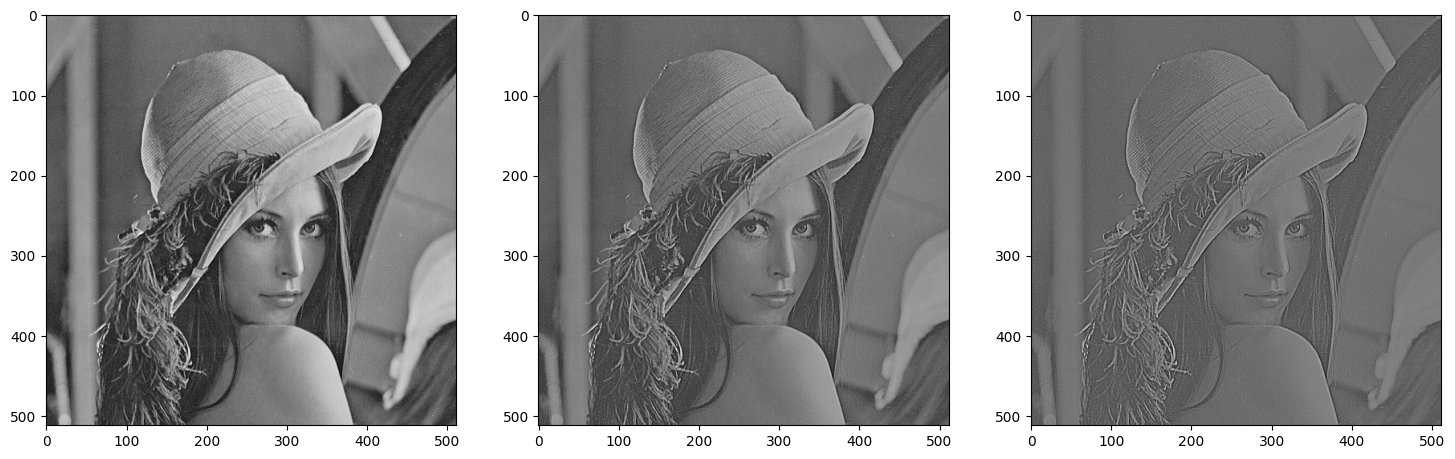

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1); plt.imshow(sharpend_1, cmap='gray')
plt.subplot(1, 3, 2); plt.imshow(sharpend_3, cmap='gray')
plt.subplot(1, 3, 3); plt.imshow(sharpend_8, cmap='gray')

# Section 5. Geometric Transformation

In [ ]:
im = load_image('lenna.jpg')

**Subsampling**. Downsample the `lenna` image by factor of 16. Use a smple subsampling. The original resolution is 512x512, and after downsampling, the resolution should be 32x32.

You **cannot use OpenCV** resizing function for this question.

(32, 32)


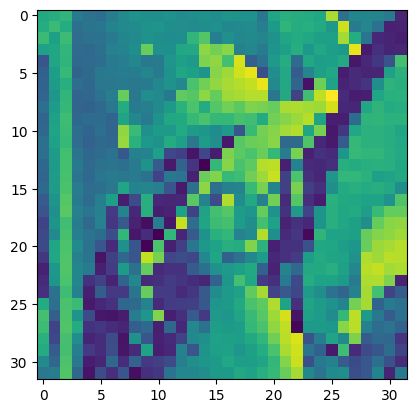

In [ ]:
#@title Question a) Subsampling
# Your code goes here.
im_subsampled = np.zeros((32, 32), np.float32)

step_h = 512 // 32
step_w = 512 // 32
for i in range(32):
  for j in range(32):
    im_subsampled[j][i] = np.sum(im[((j+1)*step_h-1),((i+1)*step_w-1)])


plt.imshow(im_subsampled)
print(im_subsampled.shape)

**Box-downsampling**. Downsample the `lenna` image by factor of 16. Use a smple subsampling. The original resolution is 512x512, and after downsampling, the resolution should be 32x32.

You **cannot use OpenCV** resizing function for this question.

(32, 32)


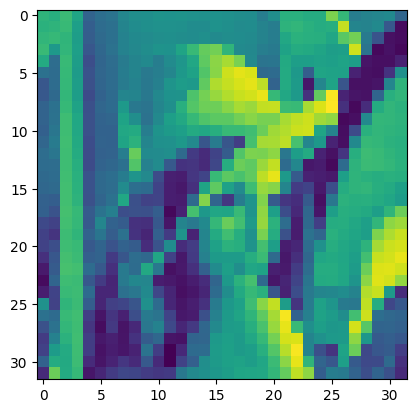

In [ ]:
#@title Question b) Box-downsampling

# Your code goes here.
im_boxdownsampled = np.zeros((32, 32), np.float32)
h,w,c = im.shape
step_h = h // 32
step_w = w // 32
for i in range(32):
  for j in range(32):
    im_boxdownsampled[j][i] = np.sum(im[j*step_h:(j+1)*step_h, i*step_w:(i+1)*step_w ]) / (step_h * step_w)

plt.imshow(im_boxdownsampled)
print(im_boxdownsampled.shape)

Run the block below and you can see the difference between two different downsamplings.

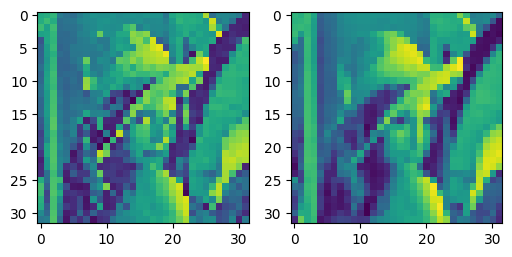

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1); plt.imshow(im_subsampled)
plt.subplot(1, 2, 2); plt.imshow(im_boxdownsampled)

**Bilinear interpolation**. Let us shifting an image using bilinear interpolation. You can use

You **cannot use OpenCV resizing function, and scipy interpolation** for this question.

You can just implement it using for-loop. If you prefer to use matrix form, you may find these functions very useful:
- np.meshgrid
- np.floor, np.ceil
- np.ravel_multi_index

In [ ]:
#@title Question c) Bilinear interpolation [Only for IEMS5707]

def bilinear(im, vx, vy):
  # im: input color image
  # vx: movement in x direction
  # vy: movement in y direction
  out = None

  # Your code goes here.

  return out

After finish your implmentation, try it the following two blocks

NameError: ignored

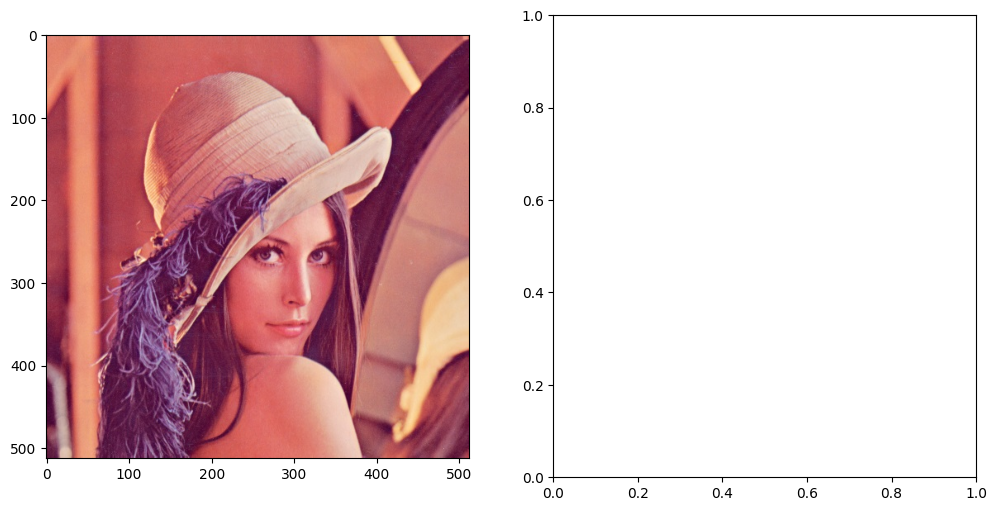

In [ ]:
#@title Test interpolation on a simple image. The face should move to the bottom left corner

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1); plt.imshow(im)
plt.subplot(1, 2, 2); plt.imshow(bilinear(im, -30.5, 100.5))

In [ ]:
#@title Test interpolation to generate a sequence. The image should move vertically, continuously, and **smoothly**.

im_small = cv2.resize(im, (32, 32), cv2.INTER_AREA)
ims = [bilinear(im_small, 0.5, vy) for vy in np.linspace(0, 5, 50)]
create_anim(ims, interval=100)

# Section 6. Image Pyramid

In [ ]:
im_tianfan = load_image('tianfan.jpg')
im_apple = load_image('apple.jpg')

In [ ]:
#@title Utility functions to create Gaussian pyramid and laplacian pyramid

def create_pyramids(im, levels):
  gauss_pyd = [im.copy()]
  laplacian_pyd = []
  current_gauss = im
  for i in range(levels - 1):
   next_gauss = cv2.pyrDown(current_gauss)
   current_laplacian = current_gauss - cv2.pyrUp(next_gauss)
   gauss_pyd.append(next_gauss)
   laplacian_pyd.append(current_laplacian)
   current_gauss = next_gauss
  laplacian_pyd.append(current_gauss)
  return gauss_pyd[::-1], laplacian_pyd[::-1]

def reconstruct_from_laplacian_pyramid(laplacian_pyd):
  levels = len(laplacian_pyd)
  im = laplacian_pyd[0]
  for i in range(1, levels):
    im = cv2.pyrUp(im) + laplacian_pyd[i]
  return np.clip(im, 0.0, 1.0)

## Question a)

Create Laplacian pyramid and Gaussian pyramid of `im_tianfan` and visualize it. Use a 6-level pyramid.



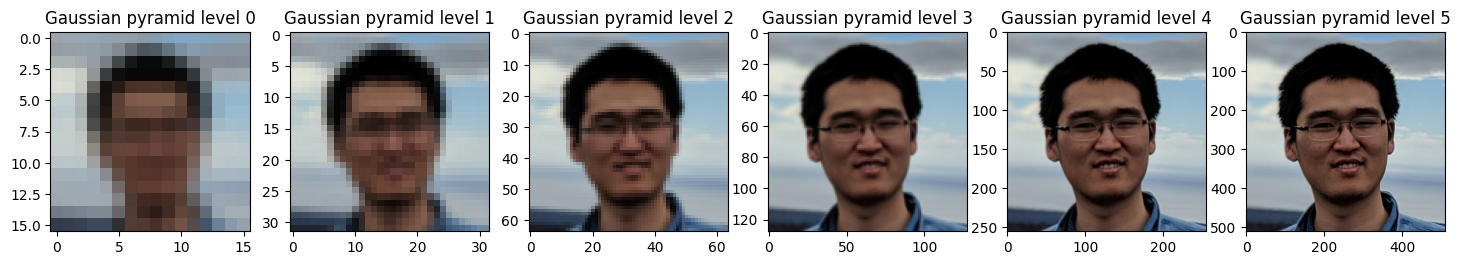

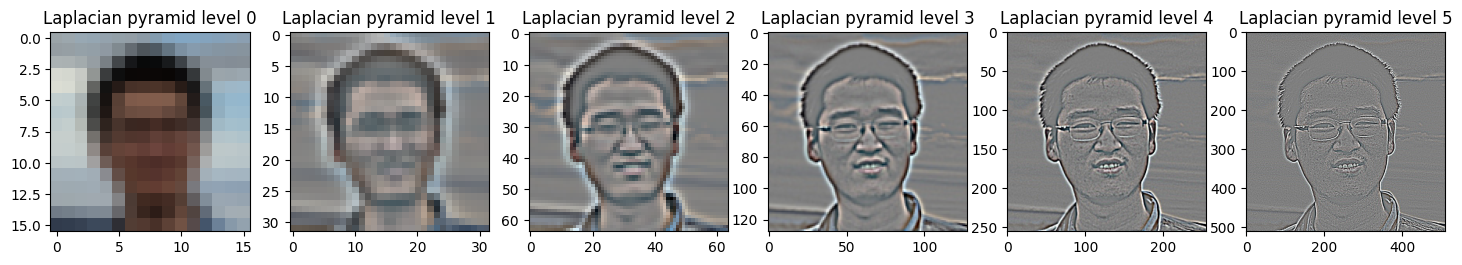

In [ ]:
# Your code goes here
gauss_pyd_tianfan, laplacian_pyd_tianfan = create_pyramids(im_tianfan, 6)

# Visualize the pyramid
plt.figure(figsize=(18, 3))
for i in range(6):
  plt.subplot(1, 6, i+1)
  plt.imshow(gauss_pyd_tianfan[i])
  plt.title(f'Gaussian pyramid level {i}')

plt.figure(figsize=(18, 3))
for i in range(6):
  plt.subplot(1, 6, i+1)
  if i == 0:
    plt.imshow(laplacian_pyd_tianfan[i])
  else:
    # Except the first level, the rest of laplacian pyramid
    plt.imshow(np.clip(laplacian_pyd_tianfan[i] * np.power(1.5, i) + 0.5, 0.0, 1.0))
  plt.title(f'Laplacian pyramid level {i}')

Then reconstruct the original `im_tianfan` from the laplacian pyramid, and visualize the result.

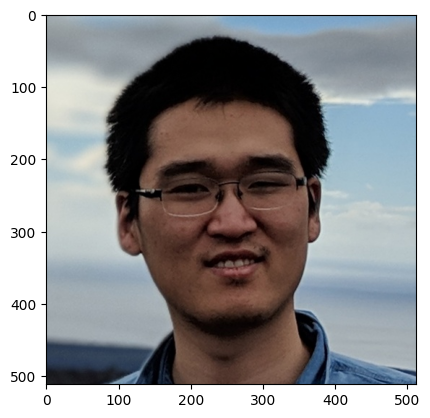

In [ ]:
# Your code goes here

out = reconstruct_from_laplacian_pyramid(laplacian_pyd_tianfan)

plt.imshow(out)

## Question b)

Create Laplacian pyramid `im_tianfan` and `im_apple`, and merge them as suggested by Lecture Note 6. The result image should look like:



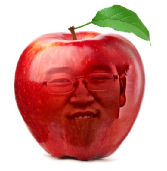

In [ ]:
# You code goes here
gauss_pyd_apple, laplacian_pyd_apple = create_pyramids(im_apple, 6)

gauss_pyd_fused = 5 * gauss_pyd_tianfan + (1-5) * gauss_pyd_apple
laplacian_pyd_fused = 5 * laplacian_pyd_tianfan + (1-5) * laplacian_pyd_apple

a = 5
# fused_im = a * laplacian_pyd_tianfan + (1-a) * laplacian_pyd_apple

plt.figure(figsize=(18, 3))
for i in range(6):
  plt.subplot(1, 6, i+1)
  if i == 0:
    plt.imshow(laplacian_pyd_fused[i])
  else:
    # Except the first level, the rest of laplacian pyramid
    plt.imshow(np.clip(laplacian_pyd_fused[i] * np.power(1.5, i) + 0.5, 0.0, 1.0))
  plt.title(f'Laplacian pyramid level {i}')
  # gauss_pyd_fused, laplacian_pyd_fused = create_pyramids(fused_im, 6)

# im_fused = reconstruct_from_laplacian_pyramid(fused_im)
# plt.imshow(im_fused)

AttributeError: ignored

## Question c) High-dynamic range fusion [Not require. A bonus question]

In this question, let us try to fuse multiple images with different exposure, as we discussed in Lecture Note 6.

The actual HDR fusion is very complicated, and here we just try a simple version. As we discussed, the importance for any fusion algorithm is to determine the weight of each image and each level. Here we utilize the Gaussian pyramid to determine it. Specifically, the weight for level `L` and image `i` of the laplacian pyramid is determined by the corresponding Gaussian pyramid value `G_i,L`:

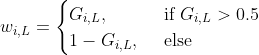

Feel free to also design your own fusion method, and please refer to the paper for more details. [High dynamic range imaging with short- and long-exposures based on artificial remapping using multiscale exposure fusion](https://www.sciencedirect.com/science/article/pii/S1047320322001158)

Requirement for a successful fusion:
- No artifacts in fused image
- Shadow regions should be visible
- Details in highlight regions (like the window) should be preserved

This is a bonus question, and I won't provide very detailed instruction

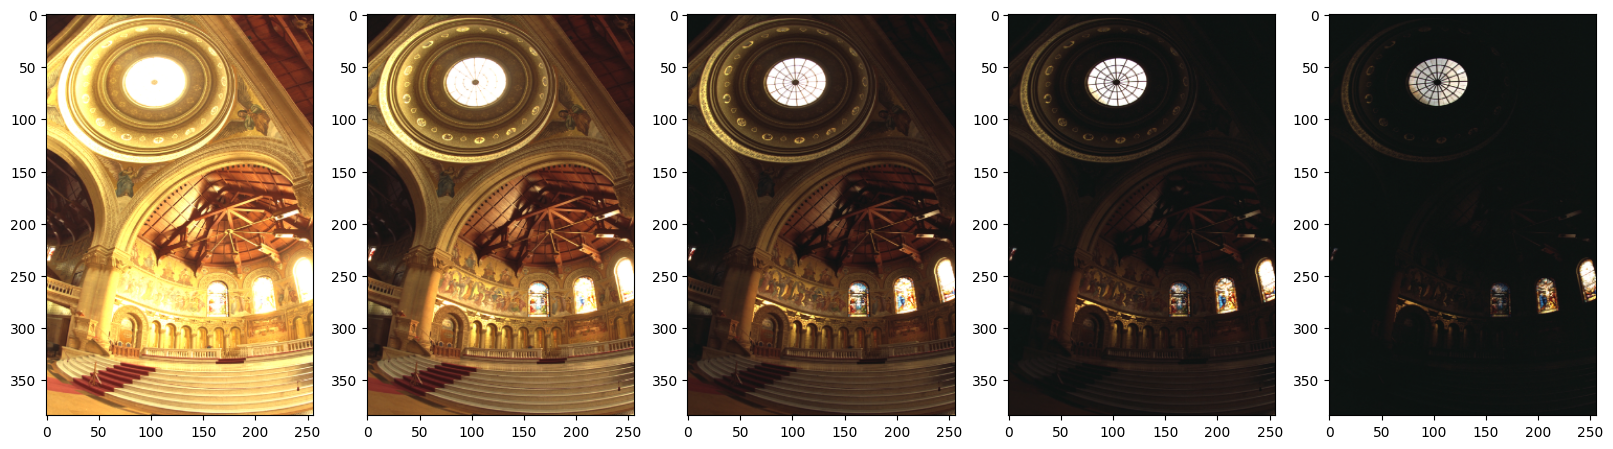

In [ ]:
# Load 5 images with different exposures

ims = [cv2.resize(load_image(name)[30:700, 20:420, :], (256, 384), cv2.INTER_AREA)
       for name in ['memorial0062.png', 'memorial0064.png', 'memorial0066.png', 'memorial0068.png', 'memorial0070.png']]

nim = len(ims)
plt.figure(figsize=(20, 6))
for i in range(nim):
  plt.subplot(1, nim, i + 1); plt.imshow(ims[i])

In [ ]:
# Your code goes here

plt.imshow(fused_im)